# ITM 891 - Part 4
### Regression model to predict IMDb rating

In [1]:
%matplotlib inline

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Note: Please change filename directory before executing next cell

In [3]:
imdb = pd.read_csv('/Users/syedkashif9786/Documents/Michigan State University/Large Scale Data Analysis/Imdb_processed.csv')

### Preparing data for modeling
* Selecting necessary independent variables
* Splitting dataset into 2 parts - Indpendent variables and Dependent variable
* Using LabelEncoder to convert Categorical variables to numeric
* Using OneHotEncoder to convert nominal numeric variables to dummy variables
* Splitting the dataset into training and testing sets

In [4]:
ind_var = ['movie_title', 'title_year', 'content_rating', 'budget', 'Dir_FB_likes', 
           'Cast_FB_likes', 'Action', 'Comedy', 'Crime', 'Drama','Romance', 'Thriller']
imdb_x = imdb[ind_var]
imdb_y = imdb['imdb_score']

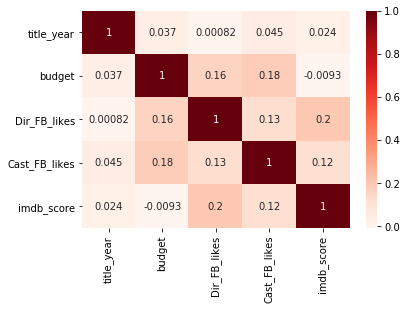

In [14]:
# Correlation matrix
imdb_corr = imdb[['title_year', 'content_rating', 'budget', 'Dir_FB_likes', 'Cast_FB_likes', 'imdb_score']].corr()
sns.heatmap(imdb_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [6]:
# Label Encoder
ctg_var = ['title_year', 'content_rating']
for var in ctg_var:
    le = LabelEncoder()
    imdb_x[var] = le.fit_transform(imdb_x[var])

/Users/syedkashif9786/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [7]:
# OneHot Encoder
for var in ctg_var:
    ohe = OneHotEncoder()
    ohe_df = pd.DataFrame(ohe.fit_transform(imdb_x[[var]]).toarray())
    ohe_df.columns = [var + '_' + str(s) for s in list(range(ohe_df.shape[1]))]
    imdb_x = pd.concat([imdb_x, ohe_df], axis = 1)
    imdb_x = imdb_x.drop([var], axis = 1)

/Users/syedkashif9786/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/Users/syedkashif9786/opt/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can s

In [8]:
# Splitting the dataset
x_train, x_test, y_train, y_test = train_test_split(imdb_x, imdb_y, test_size = 0.2, random_state = 0)

### Creating random forest regression model to predict IMDb score of a movie

In [9]:
rf_reg = RandomForestRegressor(n_estimators = 100, random_state = 1)
rf_reg.fit(x_train.iloc[:,1:], y_train)

y_pred = rf_reg.predict(x_test.iloc[:,1:])
y_pred = np.around(y_pred, decimals = 1)

In [12]:
# Performance metrics
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)

def mape(actual, pred):
    ape = abs((actual - pred)*100/actual)
    return np.mean(ape), np.median(ape)

mean_ape, median_ape = mape(y_test, y_pred)

In [15]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Percentage Error: {mean_ape}')
print(f'Median Absolute Percentage Error: {median_ape}')

Mean Squared Error: 0.723041825095057
Mean Absolute Percentage Error: 11.732714494468176
Median Absolute Percentage Error: 7.1428571428571495


In [17]:
compare_df = pd.DataFrame()
compare_df['Actual_Imdb_Rating'] = y_test
compare_df['Predicted_Imdb_Rating'] = y_pred
compare_df.head()

,Actual_Imdb_Rating,Predicted_Imdb_Rating
634,5.7,6.3
958,6.3,6.5
364,6.6,6.4
1123,6.4,5.6
142,5.2,6.1
